### Task ex

In [1]:
import pandas as pd
df_train =pd.read_csv("/mnt/c/Users/ASUS/Jupyter job/AI hack practices/2024 Pre Practice (Task)/Task/train.csv")
df_test =pd.read_csv("/mnt/c/Users/ASUS/Jupyter job/AI hack practices/2024 Pre Practice (Task)/Task/test.csv")

In [2]:
df_train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no


In [3]:
df_test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,4000,44,services,married,secondary,no,27,no,no,cellular,may,485,1,-1,0,unknown,no
1,4001,53,admin.,divorced,secondary,no,26,yes,no,cellular,may,56,1,359,1,failure,no
2,4002,36,technician,married,secondary,no,191,no,no,cellular,aug,69,1,-1,0,unknown,no
3,4003,58,technician,divorced,secondary,no,-123,no,no,cellular,aug,131,2,-1,0,unknown,no
4,4004,26,student,single,secondary,no,-147,no,no,unknown,jun,95,2,-1,0,unknown,no


### Merge the data

In [4]:
df_train['train_flag']=1
df_test['train_flag']=0
df = pd.concat([df_train, df_test], axis =0)

### check the data

In [5]:
df.nunique() 

id            4521
age             67
job             12
marital          3
education        4
default          2
balance       2353
housing          2
loan             2
contact          3
month           12
duration       875
campaign        32
pdays          292
previous        24
poutcome         4
y                2
train_flag       2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 521
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  month       4521 non-null   object
 11  duration    4521 non-null   int64 
 12  campaign    4521 non-null   int64 
 13  pdays       4521 non-null   int64 
 14  previous    4521 non-null   int64 
 15  poutcome    4521 non-null   object
 16  y           4521 non-null   object
 17  train_flag  4521 non-null   int64 
dtypes: int64(8), object(10)
memory usage: 671.1+ KB


In [7]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y,train_flag
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no,1
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no,1
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no,1
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no,1
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no,1


## try pca ?

Object columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Explained Variance Ratio: [0.142435   0.0952315  0.08667827 0.08204769 0.07639997 0.06532351
 0.05837289 0.05252493 0.051631   0.05112142 0.0460249  0.04275158
 0.03259683 0.02974318 0.02956782 0.02543786 0.02463329 0.00747837]


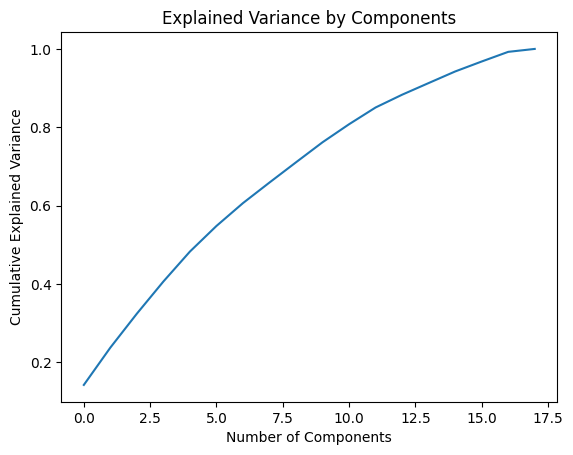

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
# Load your dataset
# df = pd.read_csv("your_dataset.csv")

# Step 1: Identify object data types
object_cols = df.select_dtypes(include=['object']).columns
print("Object columns:", object_cols)

# Step 2: Handle object data
for col in object_cols:
    # Example: Use Label Encoding for simplicity
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

# Step 3: Handle missing values (if any)
df = df.fillna(df.mean())

# Step 4: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 5: Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Step 6: Analyze results
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Plot cumulative explained variance
import matplotlib.pyplot as plt

plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 521
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          4521 non-null   int64
 1   age         4521 non-null   int64
 2   job         4521 non-null   int64
 3   marital     4521 non-null   int64
 4   education   4521 non-null   int64
 5   default     4521 non-null   int64
 6   balance     4521 non-null   int64
 7   housing     4521 non-null   int64
 8   loan        4521 non-null   int64
 9   contact     4521 non-null   int64
 10  month       4521 non-null   int64
 11  duration    4521 non-null   int64
 12  campaign    4521 non-null   int64
 13  pdays       4521 non-null   int64
 14  previous    4521 non-null   int64
 15  poutcome    4521 non-null   int64
 16  y           4521 non-null   int64
 17  train_flag  4521 non-null   int64
dtypes: int64(18)
memory usage: 671.1 KB


### try MCA 

In [10]:
import pandas as pd
import prince


KeyboardInterrupt: 

In [ ]:
df1= df.copy()

In [ ]:
df1.drop(columns='id')

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y,train_flag
0,30,10,1,0,0,1787,0,0,0,10,79,1,-1,0,3,0,1
1,33,7,1,1,0,4789,1,1,0,8,220,1,339,4,0,0,1
2,35,4,2,2,0,1350,1,0,0,0,185,1,330,1,0,0,1
3,30,4,1,2,0,1476,1,1,2,6,199,4,-1,0,3,0,1
4,59,1,1,1,0,0,1,0,2,8,226,1,-1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,33,7,1,1,0,-333,1,0,0,5,329,5,-1,0,3,0,0
518,57,6,1,2,1,-3313,1,1,2,8,153,1,-1,0,3,0,0
519,57,9,1,1,0,295,0,0,0,1,151,11,-1,0,3,0,0
520,28,1,1,1,0,1137,0,0,0,3,129,4,211,3,1,0,0


In [ ]:
# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Ensure all variables are of type 'category'
for col in df1.columns:
    df1[col] = df1[col].astype('category')


In [ ]:
# Initialize MCA with the desired number of components
mca = prince.MCA(n_components=2, random_state=42)

# Fit MCA on the dataset
mca = mca.fit(df1)

# Transform the data
mca_data = mca.transform(df1)


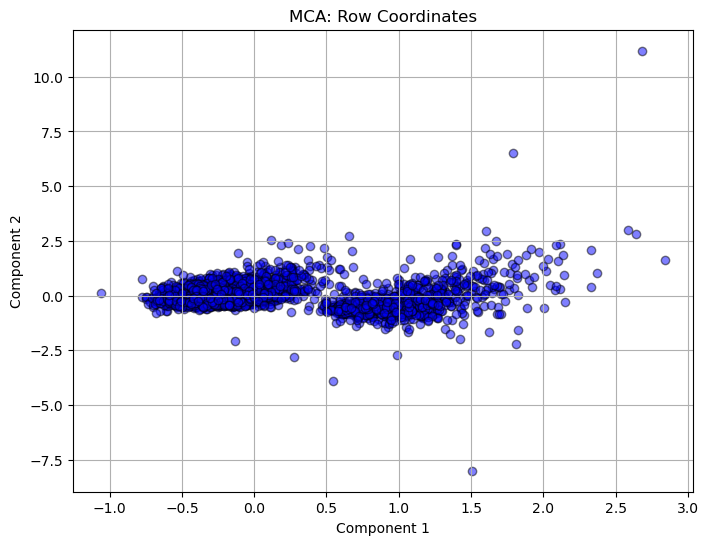

In [ ]:
import matplotlib.pyplot as plt

# Retrieve row coordinates
row_coords = mca.row_coordinates(df1)

# Plot the first two components
plt.figure(figsize=(8, 6))
plt.scatter(row_coords[0], row_coords[1], alpha=0.5, c='blue', edgecolor='k')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('MCA: Row Coordinates')
plt.grid(True)
plt.show()


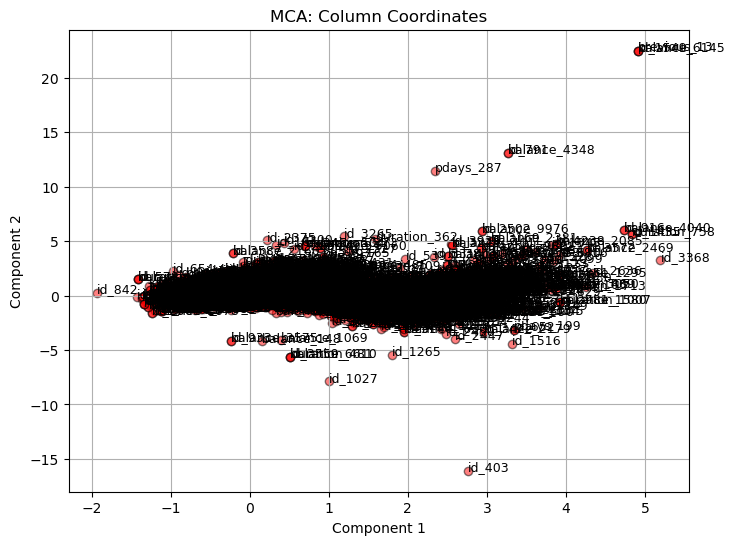

In [ ]:
# Retrieve column coordinates
col_coords = mca.column_coordinates(df1)

# Plot the first two components
plt.figure(figsize=(8, 6))
plt.scatter(col_coords[0], col_coords[1], alpha=0.5, c='red', edgecolor='k')

# Annotate points with variable names
for i, col in enumerate(col_coords.index):
    plt.text(col_coords[0][i], col_coords[1][i], col, fontsize=9)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('MCA: Column Coordinates')
plt.grid(True)
plt.show()


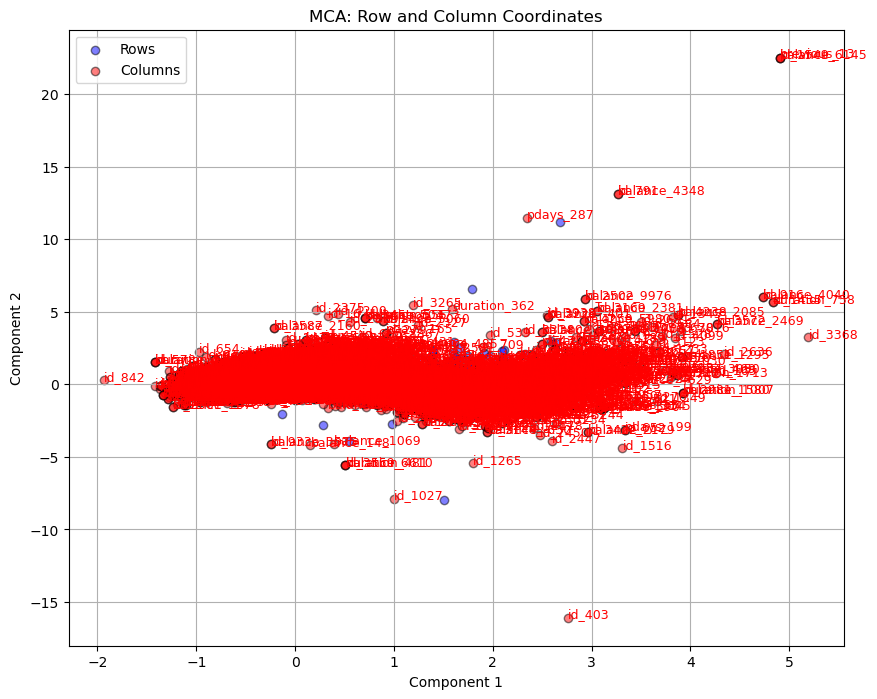

In [ ]:
# Plot row coordinates
plt.figure(figsize=(10, 8))
plt.scatter(row_coords[0], row_coords[1], alpha=0.5, c='blue', label='Rows', edgecolor='k')

# Plot column coordinates
plt.scatter(col_coords[0], col_coords[1], alpha=0.5, c='red', label='Columns', edgecolor='k')

# Annotate column points with variable names
for i, col in enumerate(col_coords.index):
    plt.text(col_coords[0][i], col_coords[1][i], col, fontsize=9, color='red')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('MCA: Row and Column Coordinates')
plt.legend()
plt.grid(True)
plt.show()


# data preprocessing 

In [7]:
df1=df.copy()

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
# Step 1: Identify object data types
object_cols = df1.select_dtypes(include=['object']).columns
print("Object columns:", object_cols)

# Step 2: Handle object data
for col in object_cols:
    # Example: Use Label Encoding for simplicity
    label_encoder = LabelEncoder()
    df1[col] = label_encoder.fit_transform(df1[col])    

Object columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [9]:
df1.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y,train_flag
0,1,30,10,1,0,0,1787,0,0,0,10,79,1,-1,0,3,0,1
1,2,33,7,1,1,0,4789,1,1,0,8,220,1,339,4,0,0,1
2,3,35,4,2,2,0,1350,1,0,0,0,185,1,330,1,0,0,1
3,4,30,4,1,2,0,1476,1,1,2,6,199,4,-1,0,3,0,1
4,5,59,1,1,1,0,0,1,0,2,8,226,1,-1,0,3,0,1


### try confussion matrix 

In [10]:
corr_matrix =df1.corr()

In [11]:
feature =corr_matrix.index

In [12]:
feature

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'train_flag'],
      dtype='object')

sns heatmap

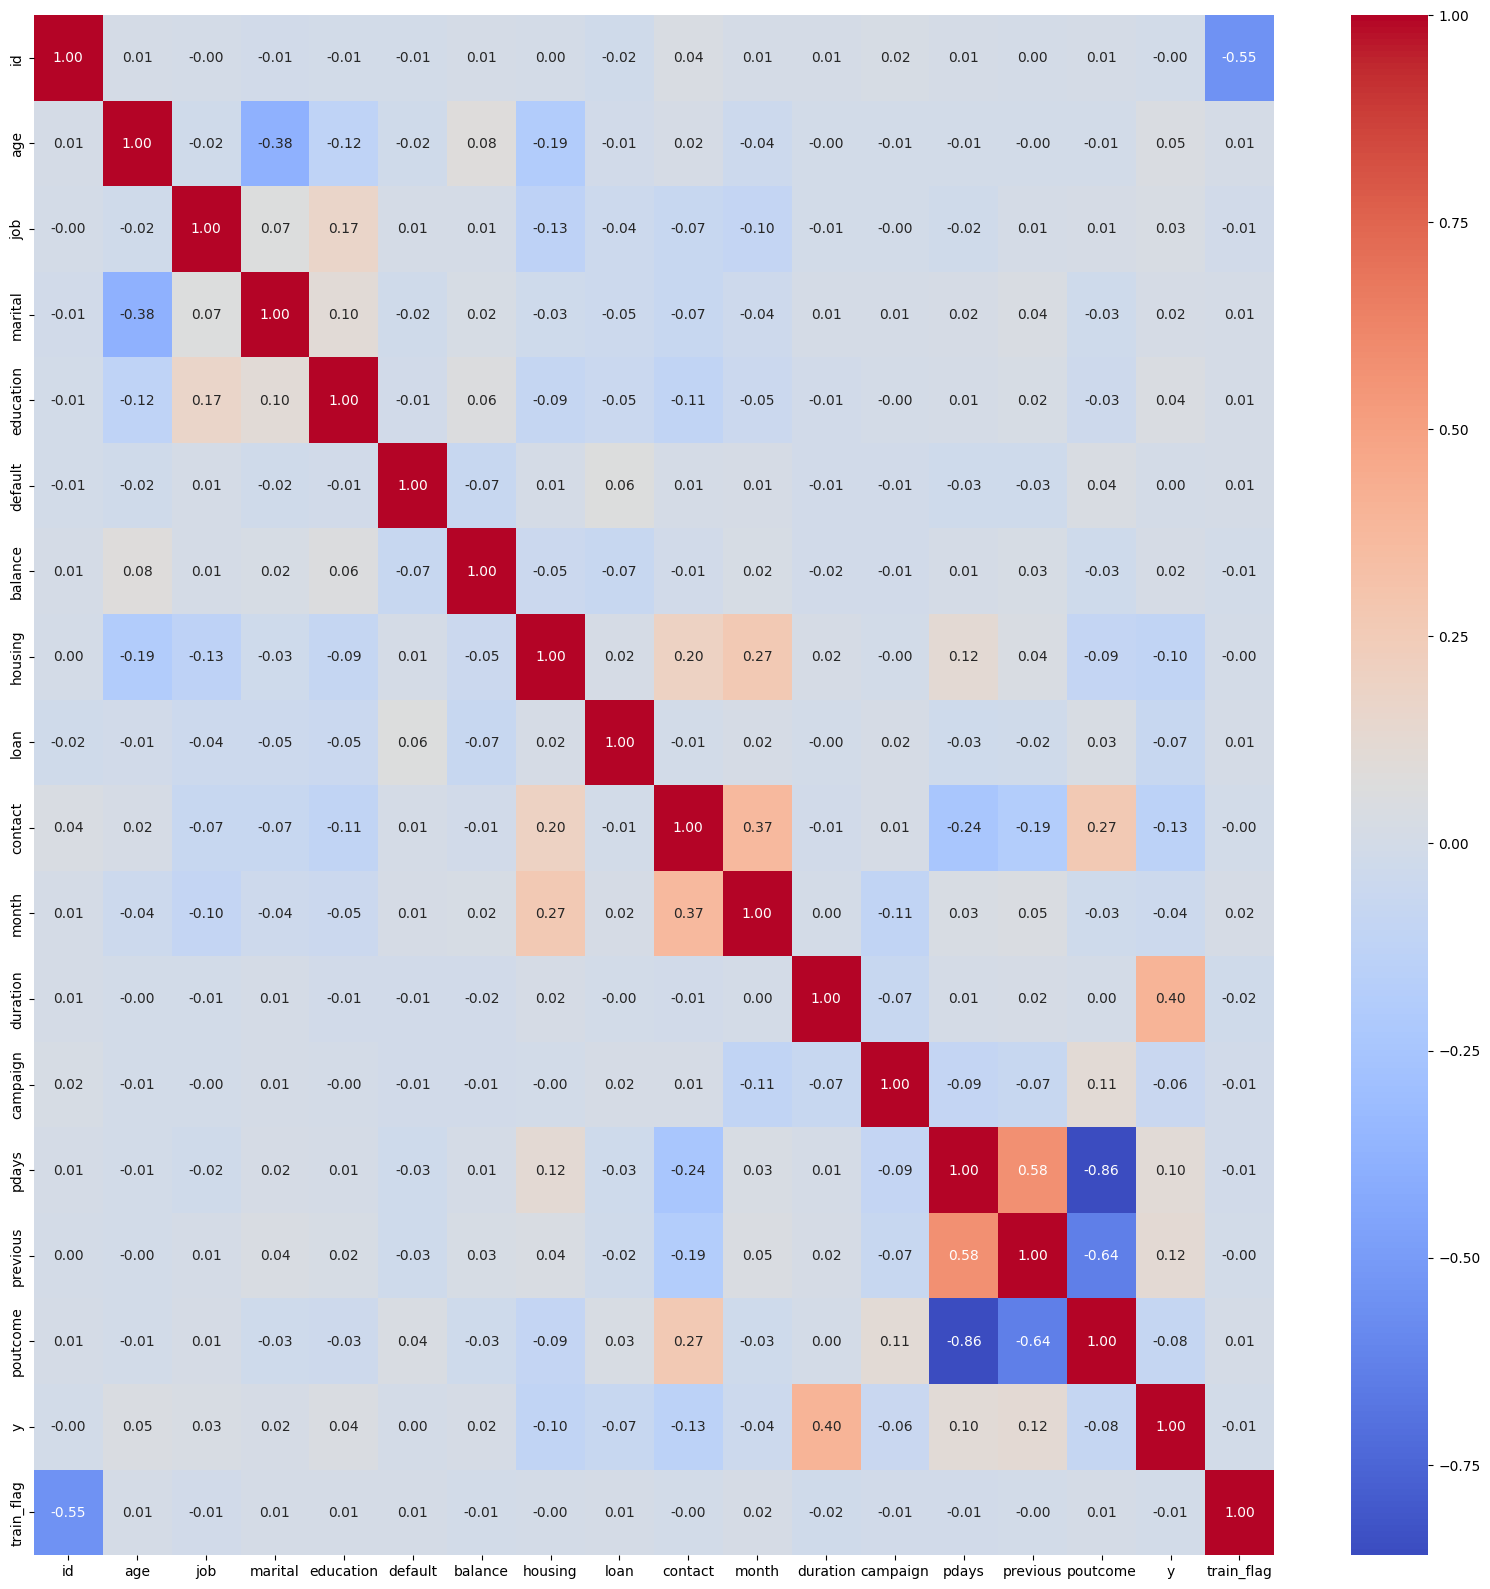

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 20))

# Generate a heatmap
sns.heatmap(df1[feature].corr(), annot=True, cmap="coolwarm", fmt=".2f")

# Show the plot
plt.show()


In [14]:
df1[feature].corr()['y'].sort_values(ascending=False)

y             1.000000
duration      0.401118
previous      0.116714
pdays         0.104087
age           0.045092
education     0.042987
job           0.027401
balance       0.017905
marital       0.015042
default       0.001303
id           -0.002812
train_flag   -0.006166
month        -0.040933
campaign     -0.061147
loan         -0.070517
poutcome     -0.082632
housing      -0.104683
contact      -0.133595
Name: y, dtype: float64

### train model xgboost 

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
# Step 1: Identify object data types
object_cols = df.select_dtypes(include=['object']).columns
print("Object columns:", object_cols)

# Step 2: Handle object data
for col in object_cols:
    # Example: Use Label Encoding for simplicity
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])    

Object columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [16]:
data_train =df[df['train_flag']==1]
data_test =df[df['train_flag']==0]

In [17]:
cols =data_train.columns.to_list


In [18]:
# Convert columns to a list
cols = data_train.columns.to_list()

# Define columns to exclude
exclude_cols = ['y', 'id', 'train_flag']

# Exclude the specified columns
cols = [col for col in cols if col not in exclude_cols]

# Separate x_train and y_train
x_train = data_train[cols]  # Features
y_train = data_train['y']   # Target


## train model pycraret

### Set up server for  experiment

In [19]:
import wandb

# This will prompt you to enter your API key
wandb.login()


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: 6432040021 (6432040021-chulalongkorn-university). Use `wandb login --relogin` to force relogin


True

In [20]:
import os
os.environ['WANDB_API_KEY'] = 'c14ac182f19b871560a2cf34899c635a076f12d7'


In [21]:
import wandb

wandb.init(project="test-project-task")

### set up pycaret 

In [22]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data=x_train, target = y_train, session_id = 123, log_experiment='wandb')

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(3999, 16)"
4,Transformed data shape,"(3999, 16)"
5,Transformed train set shape,"(2799, 16)"
6,Transformed test set shape,"(1200, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [23]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [24]:
# init setup on exp
exp.setup(data=x_train, target = y_train,use_gpu=True, session_id = 123, log_experiment='wandb')

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(3999, 16)"
4,Transformed data shape,"(3999, 16)"
5,Transformed train set shape,"(2799, 16)"
6,Transformed test set shape,"(1200, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


In [25]:
# Compare models and rank by AUC
best_model_auc = compare_models(sort='AUC')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8917,0.8824,0.2832,0.5661,0.3730,0.3213,0.3466,0.1020
lightgbm,Light Gradient Boosting Machine,0.8910,0.8802,0.3114,0.5475,0.3936,0.3391,0.3570,0.0350
rf,Random Forest Classifier,0.8939,0.8782,0.2242,0.6010,0.3212,0.2777,0.3196,0.1500
xgboost,Extreme Gradient Boosting,0.8903,0.8684,0.3456,0.5342,0.4162,0.3594,0.3713,0.0650
ada,Ada Boost Classifier,0.8907,0.8683,0.2987,0.5410,0.3776,0.3248,0.3450,0.0610
et,Extra Trees Classifier,0.8932,0.8657,0.1713,0.6555,0.2655,0.2288,0.2920,0.1230
lda,Linear Discriminant Analysis,0.8917,0.8519,0.2677,0.5767,0.3572,0.3076,0.3384,0.0120
lr,Logistic Regression,0.8917,0.8340,0.1807,0.5973,0.2749,0.2345,0.2851,0.4990
qda,Quadratic Discriminant Analysis,0.8457,0.7909,0.4022,0.3506,0.3730,0.2858,0.2876,0.0140
nb,Naive Bayes,0.8356,0.7884,0.3926,0.3301,0.3558,0.2634,0.2660,0.0130


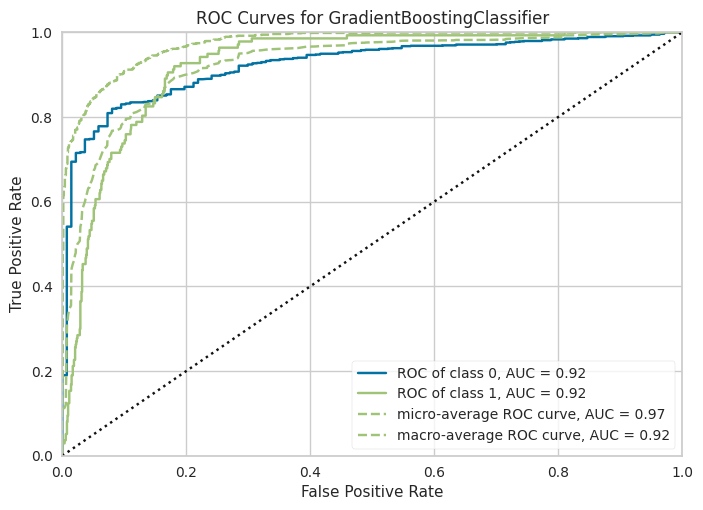

In [26]:
# plot AUC
plot_model(best_model_auc, plot = 'auc')

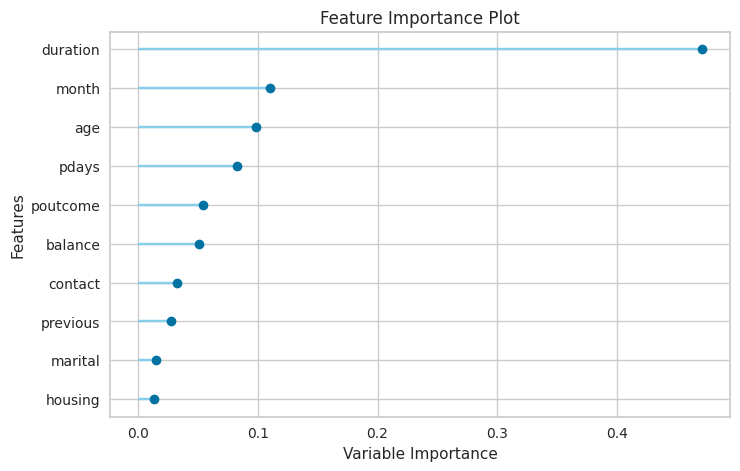

In [27]:
# plot feature importance
plot_model(best_model_auc, plot = 'feature')

### fine tuning model (xgboost)

In [28]:
# Tune the best model
tuned_model = tune_model(best_model_auc, optimize='AUC')
# ensemble model



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8821,0.8929,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8857,0.8850,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8857,0.9214,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8857,0.8724,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8857,0.8674,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8857,0.8438,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8857,0.9205,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8857,0.8892,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8857,0.8916,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


### ensemble model

In [29]:
# ensemble model
Bagging_model = ensemble_model(best_model_auc, method = 'Bagging', n_estimators = 100, fold = 5)

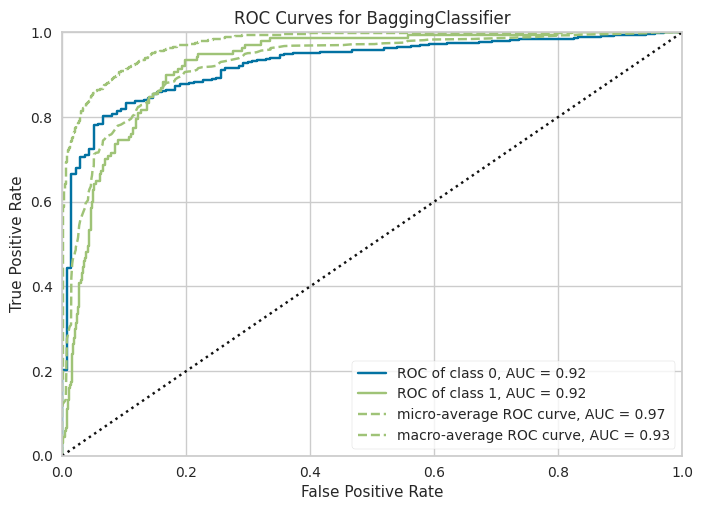

In [30]:
# plot AUC
plot_model(Bagging_model, plot = 'auc')


### blend models

In [31]:
# train a few models
gbc = create_model('gbc')
rf = create_model('rf')
lightgbm = create_model('lightgbm')

# blend models
blender_soft = blend_models([gbc,rf,lightgbm], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9143,0.9039,0.3636,0.8000,0.5000,0.4602,0.5033
1,0.9071,0.8782,0.3125,0.7143,0.4348,0.3925,0.4326
2,0.8821,0.9144,0.3438,0.4783,0.4000,0.3366,0.3422
3,0.8786,0.9051,0.3125,0.4545,0.3704,0.3057,0.3123
4,0.8964,0.8793,0.2500,0.6154,0.3556,0.3100,0.3475
5,0.8786,0.8363,0.2188,0.4375,0.2917,0.2332,0.2501
6,0.8821,0.9061,0.1875,0.4615,0.2667,0.2148,0.2408
7,0.9036,0.8672,0.2812,0.6923,0.4000,0.3576,0.4009
8,0.8821,0.8722,0.1875,0.4615,0.2667,0.2148,0.2408


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8929,0.8882,0.2424,0.6154,0.3478,0.3013,0.3405
1,0.8929,0.8636,0.1875,0.6000,0.2857,0.2446,0.2938
2,0.9071,0.9111,0.3438,0.6875,0.4583,0.4137,0.4435
3,0.8857,0.8514,0.2812,0.5000,0.3600,0.3026,0.3178
4,0.8964,0.8727,0.1875,0.6667,0.2927,0.2553,0.3164
5,0.8821,0.8330,0.1250,0.4444,0.1951,0.1526,0.1891
6,0.8893,0.9076,0.1250,0.5714,0.2051,0.1711,0.2301
7,0.8964,0.8736,0.2188,0.6364,0.3256,0.2837,0.3318
8,0.9000,0.8949,0.2188,0.7000,0.3333,0.2950,0.3543


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.8788,0.3636,0.6316,0.4615,0.4108,0.4299
1,0.8857,0.8887,0.2812,0.5000,0.3600,0.3026,0.3178
2,0.8893,0.9078,0.3750,0.5217,0.4364,0.3768,0.3831
3,0.8857,0.8897,0.3125,0.5000,0.3846,0.3253,0.3362
4,0.9036,0.8697,0.3125,0.6667,0.4255,0.3803,0.4131
5,0.8679,0.8529,0.2188,0.3684,0.2745,0.2070,0.2155
6,0.8893,0.8792,0.2188,0.5385,0.3111,0.2624,0.2942
7,0.8964,0.8671,0.2812,0.6000,0.3830,0.3344,0.3632
8,0.8964,0.8818,0.3125,0.5882,0.4082,0.3572,0.3787


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9107,0.9012,0.3636,0.7500,0.4898,0.4473,0.4826
1,0.8893,0.8765,0.2500,0.5333,0.3404,0.2885,0.3134
2,0.8893,0.9138,0.3438,0.5238,0.4151,0.3568,0.3665
3,0.8857,0.8942,0.2812,0.5000,0.3600,0.3026,0.3178
4,0.8964,0.8851,0.2188,0.6364,0.3256,0.2837,0.3318
5,0.8679,0.8490,0.1875,0.3529,0.2449,0.1799,0.1907
6,0.8893,0.9123,0.1875,0.5455,0.2791,0.2343,0.2740
7,0.9000,0.8763,0.2812,0.6429,0.3913,0.3458,0.3811
8,0.8964,0.8965,0.2500,0.6154,0.3556,0.3100,0.3475


In [32]:

# tune blender
tuned_blender = tune_model(blender_soft, optimize='AUC', search_library = 'scikit-optimize')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9071,0.9009,0.3333,0.7333,0.4583,0.4153,0.4541
1,0.8893,0.8768,0.2500,0.5333,0.3404,0.2885,0.3134
2,0.8929,0.9132,0.3438,0.5500,0.4231,0.3675,0.3798
3,0.8857,0.8954,0.2812,0.5000,0.3600,0.3026,0.3178
4,0.8964,0.8857,0.2188,0.6364,0.3256,0.2837,0.3318
5,0.8679,0.8503,0.1875,0.3529,0.2449,0.1799,0.1907
6,0.8893,0.9100,0.1875,0.5455,0.2791,0.2343,0.2740
7,0.9000,0.8769,0.2812,0.6429,0.3913,0.3458,0.3811
8,0.8964,0.8958,0.2812,0.6000,0.3830,0.3344,0.3632


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


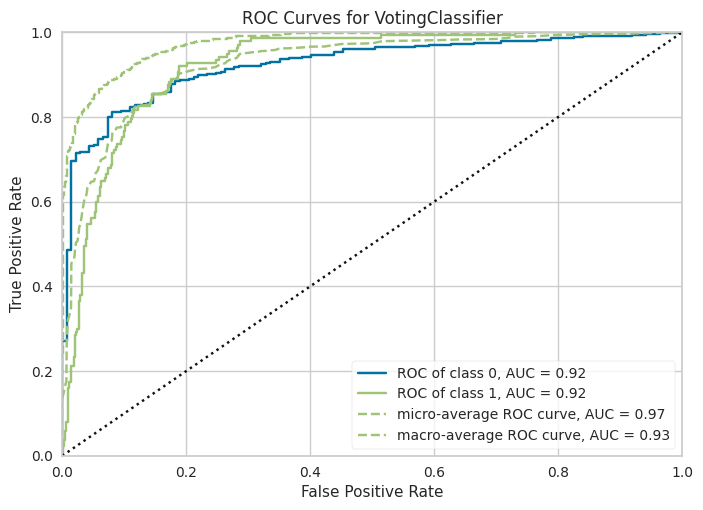

In [33]:
# plot AUC
plot_model(tuned_blender, plot = 'auc')

i think tuned_blender have best score so i want to predicted 

prediction on test dataset

In [37]:
# Convert columns to a list
cols = data_test.columns.to_list()

# Define columns to exclude
exclude_cols = ['y', 'id', 'train_flag']

# Exclude the specified columns
cols = [col for col in cols if col not in exclude_cols]

# Separate x_train and y_train
x_test = data_test[cols]  # Features
y_test = data_test['y']   # Target



In [38]:
test_results = predict_model(tuned_blender, data=x_test)


In [39]:
test_results

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,prediction_label,prediction_score
0,44,7,1,1,0,27,0,0,0,8,485,1,-1,0,3,0,0.7100
1,53,0,0,1,0,26,1,0,0,8,56,1,359,1,0,0,0.9809
2,36,9,1,1,0,191,0,0,0,1,69,1,-1,0,3,0,0.9928
3,58,9,0,1,0,-123,0,0,0,1,131,2,-1,0,3,0,0.9611
4,26,8,2,1,0,-147,0,0,2,6,95,2,-1,0,3,0,0.9882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,33,7,1,1,0,-333,1,0,0,5,329,5,-1,0,3,0,0.9736
518,57,6,1,2,1,-3313,1,1,2,8,153,1,-1,0,3,0,0.9853
519,57,9,1,1,0,295,0,0,0,1,151,11,-1,0,3,0,0.9886
520,28,1,1,1,0,1137,0,0,0,3,129,4,211,3,1,0,0.9036


In [40]:
auc_score=test_results['prediction_score']

make data frame for prediction 

In [41]:
id  =data_test['id']

In [42]:
data =pd.concat([id,auc_score],axis=1)

In [43]:
data=data.rename(columns = {'prediction_score':'y'})

In [44]:
data.to_csv("/mnt/c/Users/ASUS/Jupyter job/AI hack practices/EExAI-hackathon/291124_EExAI.csv", encoding="utf-8", index=False)


In [45]:
import os
print(os.getcwd())


/mnt/c/Users/ASUS/Jupyter job/AI hack practices/EExAI-hackathon
